In [1]:
# CAE on MNIST dataset

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image as IPImage
from PIL import Image

import sys
sys.setrecursionlimit(1000000)

In [3]:
from ConvAE import ConvAE

In [4]:
# load data
import pickle
fname = 'first/sample_50_28_sort.pkl'
with open(fname, 'rb') as fp:
    datadict = pickle.load(fp)
X = datadict['data'].astype('float32')
# Norm
X_train = (X - X.min()) / (X.max() - X.min())

In [5]:
X_in = X_train.reshape(-1,28,28,1)
X_mean = np.mean(X_train)
X_w = X_in - X_mean
X_tr = X_w[0:12000]
X_te = X_w[12000:] 

In [6]:
cae = ConvAE(X_in = X_tr)
cae.cae_build()

[[None, 28, 28, 1], [None, 14, 14, 10], [None, 7, 7, 10]]


In [7]:
# train
num_epochs = 20
learning_rate = 0.002
batch_size = 100
cae.cae_train(num_epochs=num_epochs, learning_rate=learning_rate, batch_size=batch_size)

0 1092.4
1 899.951
2 1090.28
3 1025.17
4 1087.21
5 895.483
6 1147.0
7 999.312
8 1021.18
9 937.385
10 308.198
11 276.165
12 269.614
13 234.38
14 218.02
15 187.093
16 237.593
17 182.931
18 175.066
19 162.936


(14, 28, 28, 1)


/home/mzx/.local/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/mzx/.local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/mzx/.local/lib/python3.4/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
/home/mzx/.local/lib/python3.4/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


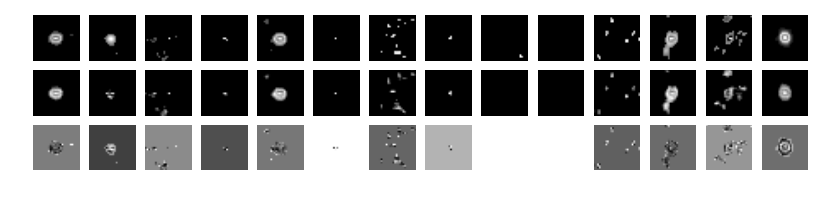

In [8]:
n_examples = 14
idx = np.random.permutation(len(X_te))
test_xs = X_te[idx[0:n_examples],:,:,:].astype('float32')

recon = cae.cae_test(img=test_xs)
print(recon.shape)

def gen_norm(img):
    return (img-img.min())/(img.max() - img.min())

fig, axs = plt.subplots(3, n_examples, figsize=(10, 2))
for example_i in range(n_examples):
    # raw
    axs[0][example_i].imshow(
        np.reshape(test_xs[example_i, :], (28, 28)), cmap='gray')
    axs[0][example_i].axis('off')
    # learned
    axs[1][example_i].imshow(
        np.reshape(
            np.reshape(recon[example_i, ...], (784,)),
            (28, 28)), cmap='gray')
    axs[1][example_i].axis('off')
    # residual
    norm_raw = gen_norm(np.reshape(test_xs[example_i, :], (28, 28)))
    norm_est = gen_norm(np.reshape(np.reshape(recon[example_i, ...], (784,)),(28, 28)))
    axs[2][example_i].imshow(norm_raw - norm_est, cmap='gray')
    axs[2][example_i].axis('off')

fig.show()
plt.draw()